In [1]:
import numpy as np
from pandas.io.parsers import read_csv
from pandas import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from scipy.optimize import minimize
import scipy.optimize as opt
from sklearn.preprocessing import OneHotEncoder
import math
import random as rdm
import scipy.optimize as opt

In [2]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Graphics in SVG format are more sharp and legible

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'

In [3]:
def lee_csv(filename):
    valores = read_csv(filename, header= None)
    valores.columns = ['edad', 'educacionEsposa','educacionEsposo','numHijos','religionEsposa','trabajandoEsposa','ocupacionEsposo','indiceVida','exposicionMedios','metodoAnticonceptivo']
    return valores.values
datos = lee_csv('C:/Users/HAO-H/Documents/Universidad/AA/zPracticas/practica7_EntregaFinal/cmc.data')
#C:\Users\HAO-H\Documents\Universidad\AA\zPracticas\practica7_EntregaFinal
datos

array([[24,  2,  3, ...,  3,  0,  1],
       [45,  1,  3, ...,  4,  0,  1],
       [43,  2,  3, ...,  4,  0,  1],
       ...,
       [39,  3,  3, ...,  4,  0,  3],
       [33,  3,  3, ...,  2,  0,  3],
       [17,  3,  3, ...,  4,  0,  3]], dtype=int64)

In [4]:
m, n = datos.shape
X = datos[:,:n-1]
#cogemos por metodo anticonceptivo
Y = datos[:,n-1:n]
print(X.shape)
print(Y.shape)

(1473, 9)
(1473, 1)


In [5]:
#1
Xent = X[:291,:]
Yent = Y[:291,:]

# Xent = pd.concat([Xent, X[1001:1150,:]])
# Yent = pd.concat([Yent, Y[1001:1150,:]])
Xent = np.concatenate((Xent,X[1001:1150,:]),axis=0)
Yent = np.concatenate((Yent,Y[1001:1150,:]),axis=0)
print(Xent)

Xval = X[292:353,:]
Yval = Y[292:353,:]
Xval = np.concatenate((Xval, X[1151:1182,:]),axis=0)
Yval = np.concatenate((Yval, Y[1151:1182,:]),axis=0)

Xpru = X[354:415,:]
Ypru = Y[354:415,:]
Xpru = np.concatenate((Xpru, X[1183:1214,:]),axis=0)
Ypru = np.concatenate((Ypru, Y[1183:1214,:]),axis=0)


#2
Xent = np.concatenate((Xent, X[416:575,:]),axis = 0)
Yent = np.concatenate((Yent, Y[416:575,:]),axis = 0)
Xent = np.concatenate((Xent, X[1215:1288,:]),axis = 0)
Yent = np.concatenate((Yent, Y[1215:1288,:]),axis = 0)


Xval = np.concatenate((Xval, X[576:609,:]),axis = 0)
Yval = np.concatenate((Yval, Y[576:609,:]),axis = 0)
Xval = np.concatenate((Xval, X[1289:1304,:]),axis = 0)
Yval = np.concatenate((Yval, Y[1289:1304,:]),axis = 0)


Xpru = np.concatenate((Xpru, X[610:643,:]),axis = 0)
Ypru = np.concatenate((Ypru, Y[610:643,:]),axis = 0)
Xpru = np.concatenate((Xpru, X[1305:1320,:]),axis = 0)
Ypru = np.concatenate((Ypru, Y[1305:1320,:]),axis = 0)


#3
Xent = np.concatenate((Xent, X[644:894,:]),axis = 0)
Yent = np.concatenate((Yent, Y[644:894,:]),axis = 0)
Xent = np.concatenate((Xent, X[1321:1427,:]),axis = 0)
Yent = np.concatenate((Yent, Y[1321:1427,:]),axis = 0)

Xval = np.concatenate((Xval, X[895:947,:]),axis = 0)
Yval = np.concatenate((Yval, Y[895:947,:]),axis = 0)
Xval = np.concatenate((Xval, X[1428:1450,:]),axis = 0)
Yval = np.concatenate((Yval, Y[1428:1450,:]),axis = 0)

Xpru = np.concatenate((Xpru, X[948:1000,:]),axis = 0)
Ypru = np.concatenate((Ypru, Y[948:1000,:]),axis = 0)
Xpru = np.concatenate((Xpru, X[1451:1473,:]),axis = 0)
Ypru = np.concatenate((Ypru, Y[1451:1473,:]),axis = 0)



[[24  2  3 ...  2  3  0]
 [45  1  3 ...  3  4  0]
 [43  2  3 ...  3  4  0]
 ...
 [45  4  4 ...  1  4  0]
 [25  3  3 ...  2  4  0]
 [36  4  3 ...  3  2  0]]


In [6]:
def s(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def coste(theta, X, y,landa):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(s(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - s(X * theta.T)))
    aux = (landa/ 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + aux

In [8]:
def gradiente(theta, X, y, reg):
    theta = np.matrix(theta)
    #print(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    #print(theta.T.shape)
    #print(X.shape)
    aux = s(X * theta.T) - y
    
    gradiente = ((X.T * aux) / len(X)).T + ((reg / len(X)) * theta)
    
    gradiente[0, 0] = np.sum(np.multiply(aux, X[:,0])) / len(X)
    
    return np.array(gradiente).ravel()

1. REGRESION LOGISTICA MULTICLASE


In [9]:
def one_vs_all(X, y, num_etiquetas, reg):
    filas = X.shape[0]
    cols= X.shape[1]

    all_theta = np.zeros((num_etiquetas, cols + 1))
    X = np.insert(X, 0, values=np.ones(filas), axis=1)
    #print(X)

    for i in range(1, num_etiquetas + 1):
        theta = np.zeros(cols + 1)
        aux_y = np.array([1 if label == i else 0 for label in y])
        aux_y = np.reshape(aux_y, (filas, 1))
        #result = opt.fmin_tnc(func= coste, x0=theta, fprime=gradiente, args =(X, aux_y,reg))

        result = minimize(fun=coste, x0=theta, args=(X, aux_y, reg), method='TNC', jac=gradiente)
        all_theta[i-1,:] = result.x
        #all_theta = result.x
       
    return all_theta


In [10]:
def costeGradiente(X,y, theta, landa):
    m=len(X)
    theta = theta.reshape(-1, y.shape[1])
    #COSTE
    coste1 = (np.sum(np.power(np.dot(X,theta)-y,2)))/(2*m)
    coste2 = coste1 + (landa/(2*m))* (np.sum(np.power(theta[1:len(theta)],2)))
    #GRADIENTE
    #para j = 0
    grad = (1 / m) * np.dot(X.T, np.dot(X, theta) - y) + (landa/ m ) * theta
    
    # j=0
    unreg_grad = (1 / m) * np.dot(X.T, np.dot(X, theta) - y)
    grad[0] = unreg_grad[0]
    return coste2, grad.flatten()


In [11]:
def predict(X, all_theta, y):
    num_etiquetas = all_theta.shape[0]
    filas = X.shape[0]
    cols= X.shape[1]
    
    ones = np.ones((filas,1))
    X = np.hstack((ones, X))
    
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    hipotesis = s(X * all_theta.T)
    #max
    hipotesis_max = np.argmax(hipotesis, axis=1)
    hipotesis_max = hipotesis_max + 1
    
    y = np.matrix(y)
    
    correcto = [1 if i == x else 0 for (i, x) in zip(hipotesis_max, y)]
    result = (sum(map(int, correcto)) / len(correcto))
    result = result * 100
    return result

In [12]:
def errorLanda(X, y, Xval, yval):
    landa = np.array([(0, 0.25, 0.5, 0.75, 1, 2, 3, 10, 20, 50, 200)]).T
    
    tamLanda = len(landa)
    num_etiquetas = 3
    
    error_entrenamiento = np.zeros((tamLanda, 1))
    error_val = np.zeros((tamLanda, 1))
    
    for i in range(tamLanda):
        landa_aux = landa[i]
        theta = one_vs_all(X, y, num_etiquetas, landa_aux)
#         print(theta)
        #obtenemos el error de cada landa
        error_entrenamiento[i] = predict(X, theta, y)
        #print(error_entrenamiento[i])
        error_val[i] = predict(Xval, theta, yval)
#         print(error_val[i])
    return landa, error_entrenamiento, error_val
landa_aux, error_entrenamiento, error_val = errorLanda(Xent,Yent, Xval, Yval)

Text(0.5, 0, 'landa')

Text(0, 0.5, 'Error')

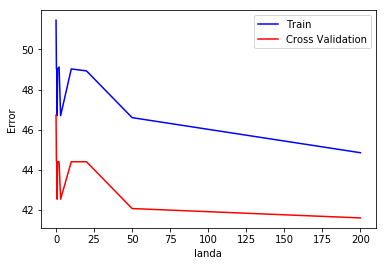

In [13]:
plt.xlabel('landa')
plt.ylabel('Error')
#plt.title('Selecting $\landa_aux$ using a cross validation set')
plt.plot(landa_aux, error_entrenamiento, 'b', label='Train')
plt.plot(landa_aux, error_val, 'g', label='Cross Validation',color='r')

plt.legend()


Los mejores valores de landa son 1 y a partir de 50. Son los valores en los que el error es minimo.

In [14]:
XentVal = np.concatenate((Xent, Xval),axis = 0)
YentVal = np.concatenate((Yent, Yval),axis = 0)

In [15]:
theta1 = one_vs_all(Xent, Yent, 3, 1)
predict(Xent, theta1, Yent)

49.0272373540856

In [16]:
theta2 = one_vs_all(Xval, Yval, 3, 1)
predict(Xval, theta2, Yval)

50.467289719626166

In [17]:
theta3= one_vs_all(Xpru,Ypru, 3, 1)
predict(Xpru, theta3, Ypru)

56.074766355140184

In [18]:
theta4= one_vs_all(XentVal,YentVal, 3, 1)
predict(XentVal, theta4, YentVal)

47.74557165861514

PORCENTAJES OBTENIDOS DE LA REGRESIÓN MULTICLASE

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x21886c9cc18>,
 <a list of 4 Text xticklabel objects>)

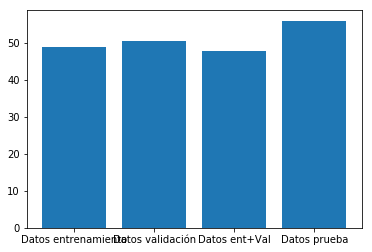

In [19]:
x = np.arange(4)
plt.bar(x, height= [49.03, 50.47, 47.75, 56.07])
plt.xticks(x,['Datos entrenamiento','Datos validación', 'Datos ent+Val', 'Datos prueba'])

REDES NEURONALES:

    Funciones auxiliares

In [20]:
def propagacion_delante(X, y, Theta1, Theta2):
    filas = len(y)
    a1_ = np.insert(X, 0, values=np.ones(filas), axis=1)
    z2_ = a1_ @ Theta1.T
    a2_ =  np.insert(s(z2_), 0, values=np.ones(filas), axis=1)
    z3_ = a2_ @ Theta2.T
    h_ = s(z3_)
    return a1_ , z2_ , a2_ , z3_ , h_

def listToArray(y):
    if type(y) == list:
        y = np.array(y).reshape(-1, 1)      
    return y

#inicializar una matriz de pesos theta, rdm = biblioteca.random
def pesosAleatorios(L_in, L_out):
    epsilon = e_ini(L_in, L_out)
    return np.random.rand(L_out, L_in+1) * 2 * epsilon - epsilon

#funcion auxiliar para retro-propagacion: derivada de la funcion sigmoide
def g_der(z):
    return np.multiply(s(z),(1-s(z)))

#funcion para elegir E inicial segun los L_in L_out
def e_ini(L_in, L_out):
    return math.sqrt(6)/math.sqrt(L_in+L_out)

#Union de thetas
#params_rn=np.hstack((thet1.ravel(), thet2.ravel()))

In [21]:
def fun_cost2(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y_list_, reg):
    [m,n] = X.shape
    theta1= np.reshape(params_rn[:num_ocultas * (num_entradas+1)],
                        (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[(num_ocultas * (num_entradas + 1)):],
                        (num_etiquetas,(num_ocultas + 1)))
    
   
    a1, z2, a2, z3, h = propagacion_delante(X, y_list_, theta1, theta2)
    y_list_ = listToArray(y_list_)
    y_aux = pd.get_dummies(y_list_.flatten())
    
    #Función de coste regularizada
    primera = np.sum((np.sum(np.multiply(y_aux, np.log(h)) + np.multiply(1-y_aux,np.log(1-h))))/(-m))
    result = primera + reg * ((np.sum(np.sum(np.power(theta1[:,1:], 2),axis=1))) + 
                               (np.sum(np.sum(np.power(theta2[:,1:], 2), axis=1))))/(2*m)
    
    return result

In [22]:
def retro_propagacion(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y_list_, reg):
    [m,n] = X.shape
    theta1= np.reshape(params_rn[:num_ocultas * (num_entradas+1)],
                        (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[(num_ocultas * (num_entradas + 1)):],
                        (num_etiquetas,(num_ocultas + 1)))
    
    a1, z2, a2, z3, h = propagacion_delante(X, y_list_, theta1, theta2) #1
    y_list_ = listToArray(y_list_)
    y_aux = pd.get_dummies(y_list_.flatten())
    
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    
    for i in range(m):
        ones = np.ones(1)
        a1 = np.hstack((ones, X[i]))
        z2 = a1 @ theta1.T
        a2 = np.hstack((ones, s(z2)))
        z3 = a2 @ theta2.T
        a3 = s(z3)

        d3 = a3 - y_aux.iloc[i,:][np.newaxis,:]
        z2 = np.hstack((ones, z2))
        d2 = np.multiply(theta2.T @ d3.T, g_der(z2).T[:,np.newaxis])
        delta1 = delta1 + d2[1:,:] @ a1[np.newaxis,:]
        delta2 = delta2 + d3.T @ a2[np.newaxis,:]
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    #gradientes regularizadas
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * reg) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * reg) / m
    
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return grad

In [23]:
def backprop(params_rn , num_entradas , num_ocultas , num_etiquetas , X, y , reg):
    return fun_cost(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg), retro_propagacion(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg) 

In [45]:
def predict2(theta1, theta2, X, y):
    
    [filas, cols] = X.shape
        
    X = np.matrix(X)
    y = np.matrix(y)
    theta1 = np.matrix(theta1)
    theta2 = np.matrix(theta2)
    
    
    a1, z2, a2, z3, hipotesis = propagacion_delante(X, y, theta1, theta2)
    
    #max
    hipotesis_max = np.argmax(hipotesis, axis=1)
    hipotesis_max = hipotesis_max + 1
    
    correcto = [1 if i == x else 0 for (i, x) in zip(hipotesis_max, y)]
    result = (sum(map(int, correcto)) / len(correcto))
    result = result * 100
    return result

In [54]:
def errorLanda2(X, y, Xval, yval, theta1_inicial, theta2_inicial):
    landa = np.array([(0, 0.25, 0.5, 0.75, 1, 2, 3, 5)]).T
    tamLanda = len(landa)
    [m, n] = X.shape
    
    num_etiquetas = 3
    num_entradas = 9
    num_ocultas = 10
    
    error_entrenamiento = np.zeros((tamLanda, 1))
    error_val = np.zeros((tamLanda, 1))
    theta_ini = np.zeros((n, 1))
    
    #Union de thetas
    params_rn_inicial = np.hstack((theta1_inicial.ravel(), theta2_inicial.ravel()))
    
    for i in range(tamLanda):

        
        #result = opt.fmin_tnc(func = fun_cost2, x0 = params_rn_inicial, fprime = retro_propagacion,  args = (num_entradas, num_ocultas, num_etiquetas, X, y, landa[i]))
        params_rn = opt.fmin_cg(maxiter=10, f=fun_cost2, x0=params_rn_inicial, fprime=retro_propagacion, args=(num_entradas, num_ocultas, num_etiquetas, X, y, landa[i]))
        
        #print(result)
        theta11 = np.reshape(params_rn[:num_ocultas * (num_entradas+1)],
                        (num_ocultas, (num_entradas + 1)))
        
        theta21 = np.reshape(params_rn[(num_ocultas * (num_entradas + 1)):],
                        (num_etiquetas,(num_ocultas + 1)))
        
        error_entrenamiento[i] = predict2(theta11, theta21, X, y)
        error_val[i] =  predict2(theta11, theta21, Xval, yval)
        
    return landa, error_entrenamiento, error_val


In [55]:
num_etiquetas = 3
num_entradas = 9
num_ocultas = 10
theta1_inicial = pesosAleatorios(num_entradas, num_ocultas)
#print(theta1_inicial.shape)
theta2_inicial = pesosAleatorios(num_ocultas, num_etiquetas)

landa_aux2, error_entrenamiento2, error_val2 = errorLanda2(Xent, Yent, Xval, Yval, theta1_inicial, theta2_inicial)

         Current function value: 1.851569
         Iterations: 10
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 1.853419
         Iterations: 10
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 1.854919
         Iterations: 10
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 1.858758
         Iterations: 10
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 1.858056
         Iterations: 10
         Function evaluations: 29
         Gradient evaluations: 29
         Current function value: 1.858911
         Iterations: 10
         Function evaluations: 27
         Gradient evaluations: 27
         Current function value: 1.862787
         Iterations: 10
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 1.863861
         Iterations:

Text(0.5, 0, 'landa')

Text(0, 0.5, 'Error')

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]
 [2.  ]
 [3.  ]
 [5.  ]]
[[42.80155642]
 [42.80155642]
 [42.80155642]
 [42.80155642]
 [42.80155642]
 [43.38521401]
 [42.80155642]
 [43.09338521]]
(8, 1)


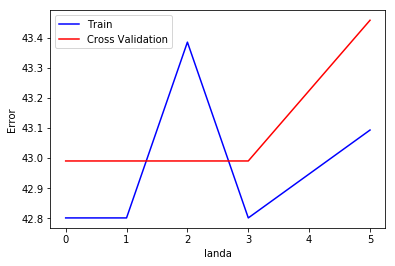

In [56]:
plt.xlabel('landa')
plt.ylabel('Error')
#plt.title('Selecting $\landa_aux$ using a cross validation set')
print(landa_aux2)
print(error_entrenamiento2)
print(error_val2.shape)
plt.plot(landa_aux2, error_entrenamiento2, 'b', label='Train')
plt.plot(landa_aux2, error_val2, 'g', label='Cross Validation',color='r')

plt.legend()